In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
import scipy

In [26]:
b = pd.read_table('cryptocurrency_prices.txt',header = None) # header = None 不把第一行当作列名

In [10]:
b.head()

,0,1,2,3,4,5,6,7,8,9,...,919,920,921,922,923,924,925,926,927,928
0,279.580000,261.000000,265.080000,264.470000,270.390000,266.380000,264.080000,265.680000,261.550000,258.510000,...,8129.97,8926.57,8598.31,9494.63,10166.40,10233.90,11112.70,10551.80,11225.30,11403.70
1,3.260000,3.080000,3.110000,3.080000,3.160000,3.060000,3.060000,3.030000,2.980000,2.940000,...,580.02,620.56,595.47,678.98,703.86,698.86,742.16,689.28,728.73,685.04
2,2.770000,0.753325,0.701897,0.708448,1.070000,1.220000,1.830000,1.830000,1.690000,1.570000,...,814.66,868.71,845.26,923.56,936.98,944.21,974.12,923.92,943.87,895.37
3,4.210000,3.850000,3.900000,3.950000,4.160000,3.990000,3.880000,4.030000,3.930000,3.950000,...,148.99,161.57,159.55,213.36,225.43,230.12,229.47,215.74,223.06,232.85
4,0.742292,0.676046,0.674739,0.656576,0.603582,0.622923,0.575855,0.609906,0.613236,0.620167,...,229.49,247.57,234.69,276.66,303.25,296.48,325.67,300.12,316.49,304.40


In [27]:
# select the first row of b
b = np.array(b)[0]
r = np.log(b[1:]/b[0:-1])

In [28]:
r

array([-6.87680697e-02,  1.55112599e-02, -2.30384390e-03,  2.21375379e-02,
       -1.49415005e-02, -8.67177323e-03,  6.04048952e-03, -1.56671073e-02,
       -1.16910919e-02, -2.05231538e-03, -2.00644854e-01,  7.13021228e-02,
        3.75344365e-02, -1.18825129e-02, -9.41772988e-03, -9.68255994e-03,
       -8.06053120e-02,  5.14334271e-02,  1.88634236e-02, -4.70484667e-03,
        2.90701576e-02, -7.02548533e-03, -4.44891038e-03,  5.66672542e-03,
       -8.46833818e-03,  5.07215779e-03, -9.20130928e-03,  1.36401520e-02,
        2.02878101e-02,  2.03014174e-02,  4.16935938e-05,  1.55548579e-02,
       -2.25838815e-02,  1.30074496e-03,  6.81170230e-03, -2.05333928e-02,
       -2.02695135e-02,  5.63807887e-04, -1.47524650e-03, -5.26786738e-03,
        3.13794112e-03,  1.36568093e-02, -6.37301386e-03, -1.21028759e-03,
       -1.79799738e-02,  1.54249197e-02, -1.47537454e-03,  1.82875517e-02,
        2.59756997e-03, -3.40802920e-03, -6.76517245e-03,  2.70412747e-02,
       -1.02978864e-02, -

In [29]:
len(r)

928

In [66]:
# seperating data into train, validation and test set
train_set = r[0:306]
val_set = r[306:611]
test_set = r[611:]

In [40]:
test_set.shape

(316,)

# Maximum likelihood analysis

In [67]:
def gaussian_mix(x, mu, s):
    N = len(mu)
    G = 0
    for j in range(N):
        G += np.exp(-(x-mu[j])**2/(2*s**2))/np.sqrt(2*np.pi*s**2)
    G = G/N
    return G

In [68]:
h = np.logspace(-3, -1, 100)
L = [] #Empty vector to store all log-likelihood values

for i in range(len(h)):
    p = gaussian_mix(val_set,train_set,h[i])
    aux = sum(np.log(p))
    L.append(aux)

In [71]:
type(L)
L1 = np.array(L)

In [72]:
h_index =  np.where(L1 == max(L1))

In [73]:
h_opt #42

(array([42]),)

In [75]:
h_opt = h[42] #42 is the value of h_index

Text(0, 0.5, 'logL')

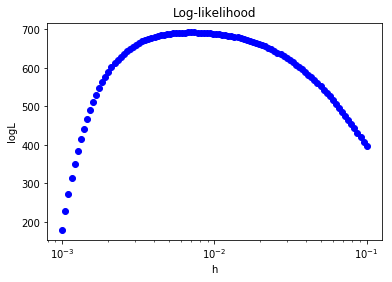

In [77]:
plt.semilogx(h,L, 'ob')
plt.title('Log-likelihood')
plt.xlabel('h')
plt.ylabel('logL')

#  Plot of optimal Gaussian kernel vs empirical distribution 


In [78]:
x = np.linspace(min(r),max(r),1000)
y = gaussian_mix(x,train_set,h_opt)

In [133]:
train_set.shape

(306,)

Text(0.5, 0, 'r')

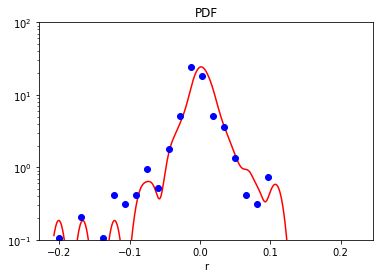

In [90]:
plt.plot(x, y, color = 'r')
# np.round(0.66*len(r)) #612
# norm_xy = plt.hist(r[0: 612], 20, normed= True)
a = norm_xy[1][:-1]
b = norm_xy[0]
plt.plot(a,b,'ob', color = 'b')

plt.ylim(0.1, 100)
plt.yscale('log')
plt.title('PDF')
plt.xlabel('r')

In [84]:
np.round(0.66*len(r))

612.0

# Plot of optimal Gaussian kernel distribution's CCDF vs rank-frequency

In [91]:
aux = np.sort(r[0: 612])

In [92]:
aux

array([-2.00644854e-01, -1.66445829e-01, -1.54473900e-01, -1.30575272e-01,
       -1.22048046e-01, -1.21306566e-01, -1.16210332e-01, -1.11823181e-01,
       -1.02381212e-01, -1.02017766e-01, -1.00634749e-01, -8.79914767e-02,
       -8.06053120e-02, -7.94985492e-02, -7.65920266e-02, -7.29654167e-02,
       -7.00885959e-02, -6.87680697e-02, -6.67968002e-02, -6.61446608e-02,
       -6.58399310e-02, -6.32111231e-02, -6.22877766e-02, -6.19863541e-02,
       -5.58158050e-02, -5.52481565e-02, -5.07202271e-02, -4.74720500e-02,
       -4.70013383e-02, -4.33875412e-02, -4.31098550e-02, -4.00967461e-02,
       -3.96329055e-02, -3.94944714e-02, -3.90200785e-02, -3.82033966e-02,
       -3.78756931e-02, -3.56233026e-02, -3.53798701e-02, -3.45102352e-02,
       -3.38200114e-02, -3.12320014e-02, -3.12315178e-02, -2.99140872e-02,
       -2.88216122e-02, -2.82892905e-02, -2.77763785e-02, -2.72974039e-02,
       -2.70819607e-02, -2.66708173e-02, -2.62900591e-02, -2.61593035e-02,
       -2.59119851e-02, -

In [108]:
y2 = np.arange(0, len(aux), 1)
y2 = 1- y2/(len(aux)+1)
x2 = np.linspace(min(r),max(r),500)
C = []
for i in range(len(x2)):
    tmp = sum(1-scipy.special.erf((x2[i]-train_set)/np.sqrt(2*h_opt**2)))/(2*len(train_set))
    C.append(tmp)

In [109]:
C

[0.9994622518536564,
 0.999356788513258,
 0.9992396838642373,
 0.9991115997355715,
 0.9989736041827777,
 0.9988271561658378,
 0.9986740648321669,
 0.9985164247843841,
 0.9983565309965203,
 0.9981967790554744,
 0.9980395578908257,
 0.9978871429207888,
 0.9977415974824375,
 0.9976046895363021,
 0.9974778290525821,
 0.997362029401679,
 0.9972578937462965,
 0.9971656251448776,
 0.9970850570834392,
 0.9970156996557011,
 0.9969567957322885,
 0.996907381234735,
 0.9968663440144251,
 0.9968324767222645,
 0.9968045202935514,
 0.9967811961011215,
 0.9967612262924096,
 0.9967433431893217,
 0.9967262897912108,
 0.9967088143095997,
 0.9966896622345774,
 0.996667569663726,
 0.9966412615067012,
 0.9966094577163281,
 0.9965708899082415,
 0.9965243296521853,
 0.9964686284108487,
 0.9964027676586285,
 0.9963259162568046,
 0.9962374908431513,
 0.9961372139759752,
 0.9960251642106792,
 0.9959018123052378,
 0.9957680384170086,
 0.9956251264585931,
 0.9954747336304527,
 0.9953188353655894,
 0.99515964826502

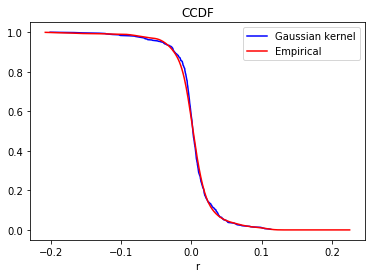

In [110]:
plt.plot(aux, y2, color = 'b', label = 'Gaussian kernel')
plt.plot(x2, C, color = 'r', label = 'Empirical')
plt.title('CCDF')
plt.xlabel('r')
plt.legend()

# Testing against test set

In [117]:
x3 = np.linspace(min(r),max(r),1000)
y3 = gaussian_mix(x,train_set,h_opt)

Text(0.5, 0, 'r')

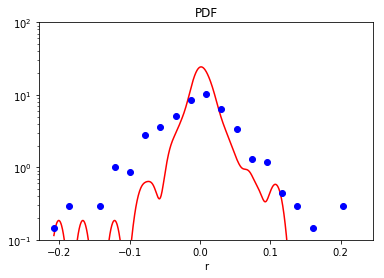

In [118]:
plt.plot(x3, y3, color = 'r')
plt.yscale('log')
# norm_xy = plt.hist(test_set, 20, normed= True)
a = norm_xy[1][:-1]
b = norm_xy[0]
plt.plot(a,b,'ob', color = 'b')

plt.ylim(0.1, 100)
plt.yscale('log')
plt.title('PDF')
plt.xlabel('r')


In [122]:
test_set = np.sort(test_set)
x4 = np.linspace(min(test_set),max(test_set),500);
y4 = np.arange(0, len(test_set), 1)
y4 = 1 - y4/(len(test_set) + 1)

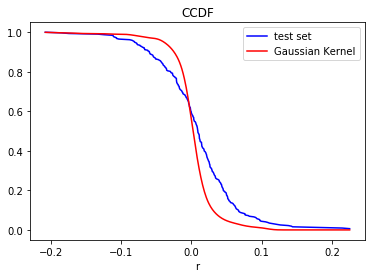

In [132]:
plt.plot(test_set, y4, color ='b', label = 'test set')
plt.plot(x4, C, color = 'r', label = 'Gaussian Kernel')
plt.title('CCDF')
plt.xlabel('r')
plt.legend()